In [1]:
import numpy as np
import pandas as pd
from sensitivity import perturbed_run, sensitivity_analysis
from FLiESANN import process_FLiES_table
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
input_df = pd.read_csv("calval_final_50_FLiES_inputs_clean.csv")[["doy", "albedo", "AOT", "COT", "vapor_gccm", "ozone_cm", "elevation_km", "SZA", "KG"]]
input_df

,doy,albedo,AOT,COT,vapor_gccm,ozone_cm,elevation_km,SZA,KG
0,53,0.027717,0.088195,-0.003143,0.418212,0.371734,0.058,110.406482,4.0
1,111,0.036438,0.237342,3.002028,1.475493,0.371618,0.058,95.128334,4.0
2,124,0.077051,0.107484,2.628000,1.590333,0.327841,0.058,92.147257,4.0
3,145,0.081791,0.094339,0.001261,1.910660,0.317626,0.058,88.451775,4.0
4,170,0.115091,0.050474,0.038796,1.494141,0.333815,0.058,86.471424,4.0
...,...,...,...,...,...,...,...,...,...
247,224,0.162858,0.143261,10.702650,4.346220,0.292348,0.529,76.341918,4.0
248,165,0.099464,0.121046,0.000000,1.876024,0.306241,0.529,71.790023,4.0
249,174,0.107731,0.109902,0.010211,2.556485,0.321885,0.529,71.627640,4.0
250,174,0.107731,0.109902,0.010211,2.556485,0.321885,0.529,71.627640,4.0


In [3]:
input_variables = ["albedo", "AOT", "COT", "vapor_gccm", "ozone_cm", "elevation_km"]
output_variables = ["Rg", "UV"]

perturbation_df, sensitivity_metrics_df = sensitivity_analysis(
    input_df=input_df,
    input_variables=input_variables,
    output_variables=output_variables,
    forward_process=process_FLiES_table
)

sensitivity_metrics_df

  1/788 [..............................] - ETA: 22s

/Users/halverso/Projects/ET-Sensitivity/sensitivity/sensitvity.py:117: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perturbation_df = pd.concat([perturbation_df, run_results])
/Users/halverso/Projects/ET-Sensitivity/sensitivity/sensitvity.py:123: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sensitivity_metrics_df = pd.concat([sensitivity_metrics_df, pd.DataFrame([[


788/788 [==============================] - 0s 392us/step


,input_variable,output_variable,metric,value
0,albedo,Rg,correlation,0.443819
0,albedo,Rg,r2,0.196975
0,AOT,Rg,correlation,-0.368927
0,AOT,Rg,r2,0.136107
0,COT,Rg,correlation,-0.446447
0,COT,Rg,r2,0.199315
0,vapor_gccm,Rg,correlation,-0.527742
0,vapor_gccm,Rg,r2,0.278511
0,ozone_cm,Rg,correlation,0.016191
0,ozone_cm,Rg,r2,0.000262


/var/folders/hk/35_x93nx79vg1zmd2fy1vcbr0000gq/T/ipykernel_39048/2257911807.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["albedo", "aerosol", "cloud\nthickness", "water\nvapor", "ozone", "elevation"])


Text(0.5, 1.0, 'FLiES Solar Radiation Sensitivity')

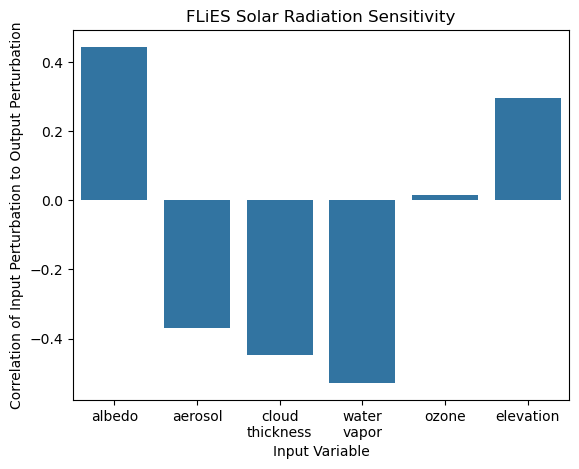

In [4]:
df = sensitivity_metrics_df
df = df[(df.output_variable == "Rg") & (df.metric == "correlation")]
ax = sns.barplot(x=df.input_variable, y=df.value)
ax.set_xticklabels(["albedo", "aerosol", "cloud\nthickness", "water\nvapor", "ozone", "elevation"])
plt.xlabel("Input Variable")
plt.ylabel("Correlation of Input Perturbation to Output Perturbation")
plt.title("FLiES Solar Radiation Sensitivity")

/var/folders/hk/35_x93nx79vg1zmd2fy1vcbr0000gq/T/ipykernel_39048/214931233.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["albedo", "aerosol", "cloud\nthickness", "water\nvapor", "ozone", "elevation"])


Text(0.5, 1.0, 'FLiES Solar Radiation Sensitivity')

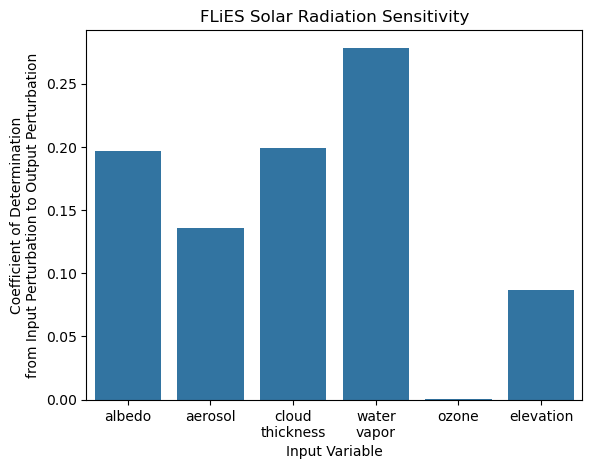

In [5]:
df = sensitivity_metrics_df
df = df[(df.output_variable == "Rg") & (df.metric == "r2")]
ax = sns.barplot(x=df.input_variable, y=df.value)
ax.set_xticklabels(["albedo", "aerosol", "cloud\nthickness", "water\nvapor", "ozone", "elevation"])
plt.xlabel("Input Variable")
plt.ylabel("Coefficient of Determination\nfrom Input Perturbation to Output Perturbation")
plt.title("FLiES Solar Radiation Sensitivity")

/var/folders/hk/35_x93nx79vg1zmd2fy1vcbr0000gq/T/ipykernel_39048/915107641.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["albedo", "aerosol", "cloud\nthickness", "water\nvapor", "ozone", "elevation"])


Text(0.5, 1.0, 'FLiES Ultra-Violet Radiation Sensitivity')

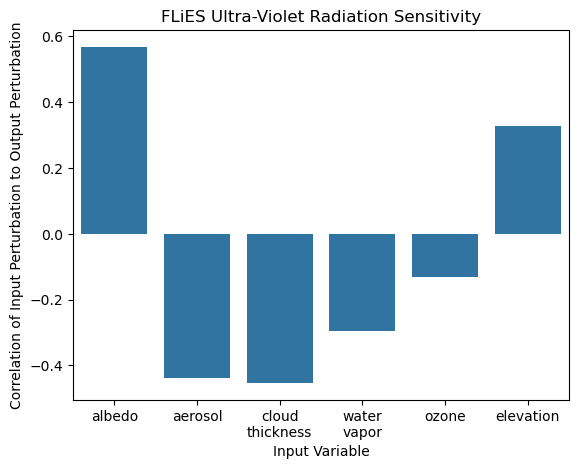

In [6]:
df = sensitivity_metrics_df
df = df[(df.output_variable == "UV") & (df.metric == "correlation")]
ax = sns.barplot(x=df.input_variable, y=df.value)
ax.set_xticklabels(["albedo", "aerosol", "cloud\nthickness", "water\nvapor", "ozone", "elevation"])
plt.xlabel("Input Variable")
plt.ylabel("Correlation of Input Perturbation to Output Perturbation")
plt.title("FLiES Ultra-Violet Radiation Sensitivity")

/var/folders/hk/35_x93nx79vg1zmd2fy1vcbr0000gq/T/ipykernel_39048/1660787085.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["albedo", "aerosol", "cloud\nthickness", "water\nvapor", "ozone", "elevation"])


Text(0.5, 1.0, 'FLiES Ultra-Violet Radiation Sensitivity')

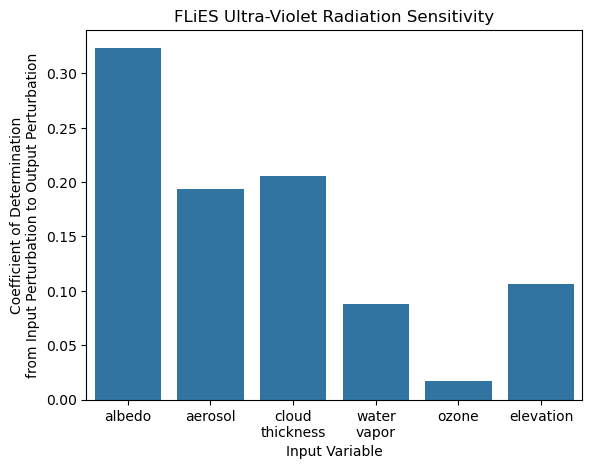

In [7]:
df = sensitivity_metrics_df
df = df[(df.output_variable == "UV") & (df.metric == "r2")]
ax = sns.barplot(x=df.input_variable, y=df.value)
ax.set_xticklabels(["albedo", "aerosol", "cloud\nthickness", "water\nvapor", "ozone", "elevation"])
plt.xlabel("Input Variable")
plt.ylabel("Coefficient of Determination\nfrom Input Perturbation to Output Perturbation")
plt.title("FLiES Ultra-Violet Radiation Sensitivity")